Name: Manasa Kinnera

email: mxk51980@ucmo.edu

In [7]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect
!pip install pycountry

In [8]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prasku/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)


In [10]:
#Testing the credentials
try:
    api.verify_credentials()
    print("Authentication OK")
except Exception as e:
    print("Error during authentication")
    print(str(e))

Authentication OK


In [11]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [12]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  231
negative number:  244
neutral number:  525


In [13]:
tweet_list

,0
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
1,No he visto la pelicula pero dicen muchos que ...
2,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
3,#ALaPatriaManosYCorazón https://t.co/WsUdrhmf7J
4,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
...,...
995,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...
996,RT @Sefuelix: @velardedaoiz2 Decía Emilio Albi...
997,"RT @nerdiariobr: Hoje dia 3 de maio, Pom Kleme..."
998,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...


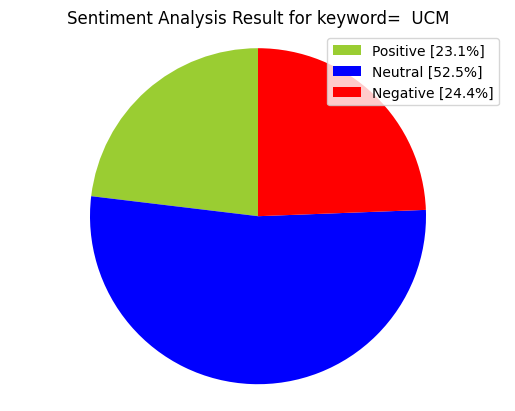

In [14]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [15]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [16]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
1,No he visto la pelicula pero dicen muchos que ...,No he visto la pelicula pero dicen muchos que ...
2,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
3,#ALaPatriaManosYCorazón https://t.co/WsUdrhmf7J,#ALaPatriaManosYCorazón https://t.co/WsUdrhmf7J
5,RT @dsn: HOY➡️04mayo2023 «Jornadas sobre el #S...,RT @dsn: HOY➡️04mayo2023 «Jornadas sobre el #S...
...,...,...
990,RT @ALEXRAM48938815: #HighEvolutionary JODER p...,RT @ALEXRAM48938815: #HighEvolutionary JODER p...
991,Encuentro mensual de nuestro director @BustosB...,Encuentro mensual de nuestro director @BustosB...
994,RT @UCMccinf: III #Congreso Internacional de c...,RT @UCMccinf: III #Congreso Internacional de c...
996,RT @Sefuelix: @velardedaoiz2 Decía Emilio Albi...,RT @Sefuelix: @velardedaoiz2 Decía Emilio Albi...


In [ ]:
tweet_list

,0
0,RT @Petethestreet1: #loweringsun on #christmas...
1,"RT @LondonEconomic: Protesters, very few of wh..."
3,Photo Journal - Day 01\n\n#lockdown2 #lockdown...
4,God love 'em - @SlowRichies opened the doors o...
5,So might wear my #addidas #prideshorts for #lo...
...,...
2461,You are NOT alone ❤\n#WeLoveYouChanyeol \n#Mad...
2465,"So I live in West Yorkshire, heading into tier..."
2467,RT @julian2tweet: Expect to see similar scenes...
2472,RT @petsarefound: Please #RT to help #FindLola...


In [17]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
1,No he visto la pelicula pero dicen muchos que ...,no he visto la pelicula pero dicen muchos que ...
2,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm
3,#ALaPatriaManosYCorazón https://t.co/WsUdrhmf7J,alapatriamanosycoraz n
5,RT @dsn: HOY➡️04mayo2023 «Jornadas sobre el #S...,hoy 04mayo2023 jornadas sobre el sahel ge...
8,@CalixtoOrozco @adolfo_cima @Aleidacr84 @Ana_H...,cima hurtado86 vclara
9,RT @AndresEHernnde1: En Villa Clara hoy defien...,en villa clara hoy defiende su tesis doctoral...
11,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...
14,Todos a la plaza #ALaPatriaManosYCorazón https...,todos a la plaza alapatriamanosycoraz n
17,@Colina_VClara La @ucmvccu presente mañana en ...,vclara la presente ma ana en la plaza uni...


In [18]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/var/folders/1m/_tvf7k2j3fs2f0ydkqmwn4m00000gn/T/ipykernel_7011/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.0,0.066667,negative,0.165,0.688,0.147,-0.1027
1,No he visto la pelicula pero dicen muchos que ...,no he visto la pelicula pero dicen muchos que ...,0.0,0.000000,negative,0.162,0.735,0.103,-0.1531
2,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.5,0.500000,positive,0.000,0.625,0.375,0.2023
3,#ALaPatriaManosYCorazón https://t.co/WsUdrhmf7J,alapatriamanosycoraz n,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @dsn: HOY➡️04mayo2023 «Jornadas sobre el #S...,hoy 04mayo2023 jornadas sobre el sahel ge...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
8,@CalixtoOrozco @adolfo_cima @Aleidacr84 @Ana_H...,cima hurtado86 vclara,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
9,RT @AndresEHernnde1: En Villa Clara hoy defien...,en villa clara hoy defiende su tesis doctoral...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
11,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
14,Todos a la plaza #ALaPatriaManosYCorazón https...,todos a la plaza alapatriamanosycoraz n,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
17,@Colina_VClara La @ucmvccu presente mañana en ...,vclara la presente ma ana en la plaza uni...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000


In [19]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [20]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [21]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,202,58.21
positive,75,21.61
negative,70,20.17


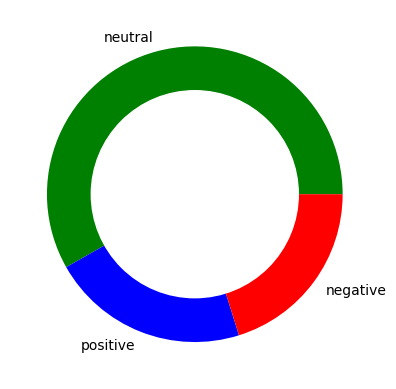

In [23]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [33]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()

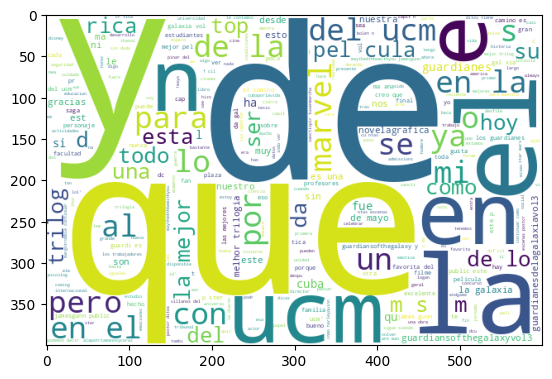

In [34]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

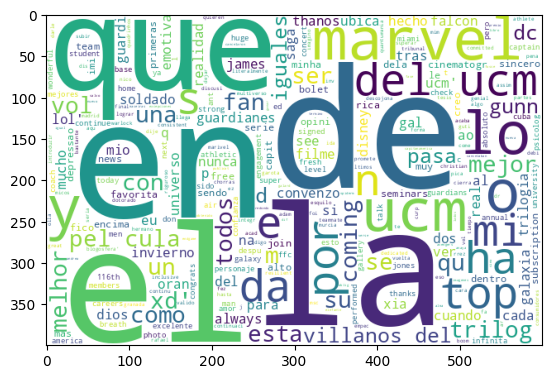

In [35]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

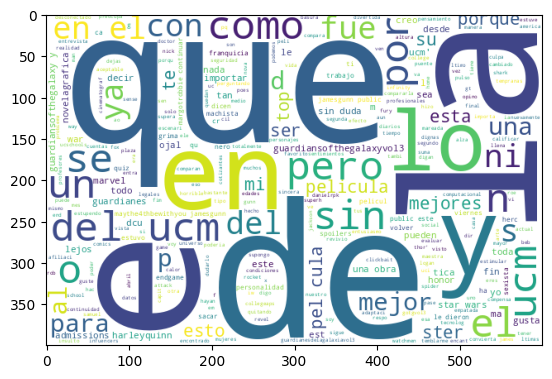

In [36]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

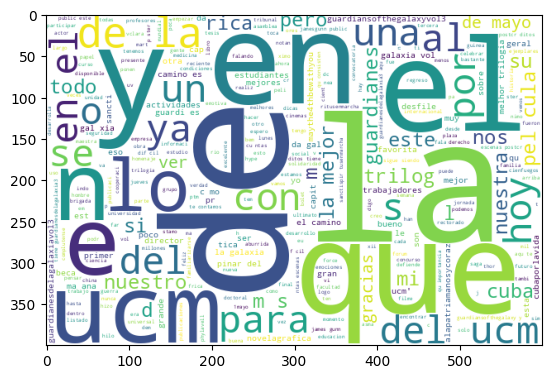

In [37]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)